# Use Shapefile Data

In [1]:
import pandas as pd 
import geopandas as gpd
from glob import glob
from OSGridConverter import latlong2grid

## 1. Read Shapefiles and create Long & Lat Columns

In [21]:
# read the files 
greenspace1 = gpd.read_file('/Users/florence/Desktop/citizen_science/open_greenspace/OS Open Greenspace (ESRI Shape File) TQ/data/TQ_GreenspaceSite.shp')
greenspace2 = gpd.read_file('/Users/florence/Desktop/citizen_science/open_greenspace/OS Open Greenspace (ESRI Shape File) TL/data/TL_GreenspaceSite.shp')
greenspace3 = gpd.read_file('/Users/florence/Desktop/citizen_science/open_greenspace/OS Open Greenspace (ESRI Shape File) SU/data/SU_GreenspaceSite.shp')
greenspace4 = gpd.read_file('/Users/florence/Desktop/citizen_science/open_greenspace/OS Open Greenspace (ESRI Shape File) SP/data/SP_GreenspaceSite.shp')

In [22]:
greenspace1.head()

,id,function,distName1,distName2,distName3,distName4,geometry
0,AC48C2C9-9043-7B2B-E053-A03BA40AE3D9,Playing Field,None,None,None,None,"POLYGON Z ((590269.480 194661.750 0.000, 59015..."
1,AC48C2C9-8EC0-7B2B-E053-A03BA40AE3D9,Religious Grounds,St Andrew's Church,None,None,None,"POLYGON Z ((590884.000 198901.540 0.000, 59088..."
2,AC48C2DD-1FAE-7B2B-E053-A03BA40AE3D9,Playing Field,None,None,None,None,"POLYGON Z ((590935.250 199521.030 0.000, 59090..."
3,AC48C232-76E1-7B2B-E053-A03BA40AE3D9,Play Space,None,None,None,None,"POLYGON Z ((590923.050 199605.960 0.000, 59091..."
4,AC48C22F-953B-7B2B-E053-A03BA40AE3D9,Play Space,None,None,None,None,"POLYGON Z ((590961.770 199617.990 0.000, 59095..."


In [23]:
# check coordinate reference system
greenspace1.crs

{'init': 'epsg:27700'}

In [5]:
# change coordinate system, such that we have the right longs and lats 
greenspace1.to_crs(epsg=4326, inplace=True)
greenspace2.to_crs(epsg=4326, inplace=True)
greenspace3.to_crs(epsg=4326, inplace=True)
greenspace4.to_crs(epsg=4326, inplace=True)

/Users/florence/opt/anaconda3/envs/data_analysis/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/florence/opt/anaconda3/envs/data_analysis/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/florence/opt/anaconda3/envs/data_analysis/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:

In [6]:
greenspace2.head()

,id,function,distName1,distName2,distName3,distName4,geometry
0,AC48C2A3-6E64-7B2B-E053-A03BA40AE3D9,Allotments Or Community Growing Spaces,None,None,None,None,"POLYGON Z ((-0.22685 52.57570 0.00000, -0.2267..."
1,AC48C2A3-6C4C-7B2B-E053-A03BA40AE3D9,Play Space,None,None,None,None,"POLYGON Z ((-0.22980 52.57573 0.00000, -0.2298..."
2,AC48C2A3-6A8D-7B2B-E053-A03BA40AE3D9,Religious Grounds,Roman Catholic Church of St Peter and All Souls,None,None,None,"POLYGON Z ((-0.24312 52.57634 0.00000, -0.2432..."
3,AC48C2A3-6AA9-7B2B-E053-A03BA40AE3D9,Playing Field,Stanley Recreation Ground,None,None,None,"POLYGON Z ((-0.23925 52.57642 0.00000, -0.2404..."
4,AC48C2A3-6C5A-7B2B-E053-A03BA40AE3D9,Bowling Green,None,None,None,None,"POLYGON Z ((-0.22756 52.57632 0.00000, -0.2281..."


In [7]:
test1 = gpd.read_file('/Users/florence/Desktop/citizen_science/open_greenspace/OS Open Greenspace (ESRI Shape File) TL/data/TL_AccessPoint.shp')
test1.head()

,id,accessType,refToGSite,geometry
0,4FA0FCE3-CF72-4C97-8CD5-AE40E18D8ADD,Pedestrian,AC48C29D-F184-7B2B-E053-A03BA40AE3D9,POINT Z (599944.850 246785.870 0.000)
1,0D8D8110-327D-4152-9CE8-C305BFE838DA,Pedestrian,AC48C3B7-3732-7B2B-E053-A03BA40AE3D9,POINT Z (599272.620 263395.660 0.000)
2,D8501150-F31A-4920-97C8-D9A49AC3DF29,Pedestrian,AC48C3B7-3732-7B2B-E053-A03BA40AE3D9,POINT Z (599274.030 263421.990 0.000)
3,33FF810C-D4DF-47F7-9B2C-1835D07DDDC9,Motor Vehicle And Pedestrian,AC48C264-C35C-7B2B-E053-A03BA40AE3D9,POINT Z (599387.290 264177.360 0.000)
4,29156217-25A9-4DF8-B488-0C80C596C6E9,Pedestrian,AC48C231-C7A6-7B2B-E053-A03BA40AE3D9,POINT Z (599411.160 264196.900 0.000)


In [8]:
len(test1), len(greenspace2)

(16039, 8706)

In [47]:
def geometry_to_coords(df):
    df['Center_point'] = df['geometry'].centroid
    #Extract lat and lon from the centerpoint
    df["lat"] = df.Center_point.map(lambda p: p.x)
    df["long"] = df.Center_point.map(lambda p: p.y)

In [48]:
geometry_to_coords(greenspace1)
geometry_to_coords(greenspace2)
geometry_to_coords(greenspace3)
geometry_to_coords(greenspace4)

In [49]:
greenspace2.head()

,id,function,distName1,distName2,distName3,distName4,geometry,Center_point,lat,long
0,AC48C2A3-6E64-7B2B-E053-A03BA40AE3D9,Allotments Or Community Growing Spaces,None,None,None,None,"POLYGON Z ((-0.22685 52.57570 0.00000, -0.2267...",POINT (-0.22599 52.57527),-0.225992,52.575273
1,AC48C2A3-6C4C-7B2B-E053-A03BA40AE3D9,Play Space,None,None,None,None,"POLYGON Z ((-0.22980 52.57573 0.00000, -0.2298...",POINT (-0.22975 52.57583),-0.229750,52.575829
2,AC48C2A3-6A8D-7B2B-E053-A03BA40AE3D9,Religious Grounds,Roman Catholic Church of St Peter and All Souls,None,None,None,"POLYGON Z ((-0.24312 52.57634 0.00000, -0.2432...",POINT (-0.24271 52.57639),-0.242710,52.576386
3,AC48C2A3-6AA9-7B2B-E053-A03BA40AE3D9,Playing Field,Stanley Recreation Ground,None,None,None,"POLYGON Z ((-0.23925 52.57642 0.00000, -0.2404...",POINT (-0.23822 52.57730),-0.238224,52.577302
4,AC48C2A3-6C5A-7B2B-E053-A03BA40AE3D9,Bowling Green,None,None,None,None,"POLYGON Z ((-0.22756 52.57632 0.00000, -0.2281...",POINT (-0.22774 52.57657),-0.227744,52.576573


In [24]:
# concatenate all of them 
greenspace = pd.concat([greenspace1, greenspace2, greenspace3, greenspace4])
greenspace.head()

,id,function,distName1,distName2,distName3,distName4,geometry
0,AC48C2C9-9043-7B2B-E053-A03BA40AE3D9,Playing Field,None,None,None,None,"POLYGON Z ((590269.480 194661.750 0.000, 59015..."
1,AC48C2C9-8EC0-7B2B-E053-A03BA40AE3D9,Religious Grounds,St Andrew's Church,None,None,None,"POLYGON Z ((590884.000 198901.540 0.000, 59088..."
2,AC48C2DD-1FAE-7B2B-E053-A03BA40AE3D9,Playing Field,None,None,None,None,"POLYGON Z ((590935.250 199521.030 0.000, 59090..."
3,AC48C232-76E1-7B2B-E053-A03BA40AE3D9,Play Space,None,None,None,None,"POLYGON Z ((590923.050 199605.960 0.000, 59091..."
4,AC48C22F-953B-7B2B-E053-A03BA40AE3D9,Play Space,None,None,None,None,"POLYGON Z ((590961.770 199617.990 0.000, 59095..."


In [14]:
import matplotlib.pyplot as plt 

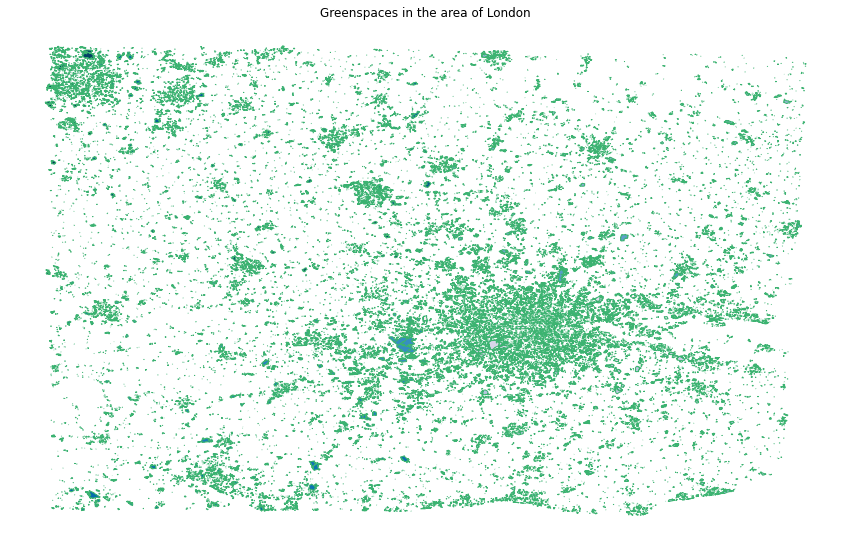

In [61]:
f, ax = plt.subplots(1, figsize=(15, 15))
greenspace.plot(ax=ax, cmap='PuBu', edgecolor='mediumseagreen')
ax.set_axis_off()
plt.title('Greenspaces in the area of London')
plt.show()

## 2. Read iNaturalist data (from London only)

In [9]:
data_folder = '/Users/florence/Desktop/citizen_science/muki_data'
london_df = pd.concat([pd.read_csv(f).assign(challenge=f.replace(".csv","")) for f in glob(data_folder+"/CNC London*.csv")])

In [10]:
london_df.columns

Index(['id', 'observed_on_string', 'observed_on', 'time_observed_at',
       'time_zone', 'user_id', 'user_login', 'created_at', 'updated_at',
       'quality_grade', 'license', 'url', 'image_url', 'sound_url', 'tag_list',
       'description', 'num_identification_agreements',
       'num_identification_disagreements', 'captive_cultivated',
       'oauth_application_id', 'place_guess', 'latitude', 'longitude',
       'positional_accuracy', 'geoprivacy', 'taxon_geoprivacy',
       'coordinates_obscured', 'positioning_method', 'positioning_device',
       'species_guess', 'scientific_name', 'common_name', 'iconic_taxon_name',
       'taxon_id', 'challenge'],
      dtype='object')

In [11]:
london_df[['longitude', 'latitude']].head()

,longitude,latitude
0,-0.190717,51.584130
1,-0.192392,51.586492
2,-0.153476,51.630852
3,0.094271,51.612413
4,0.041769,51.664052


In [14]:
london_df['latitude'].iloc[0]

51.58413

In [18]:
es = []
ns = []
for i in range(len(london_df)):
    g=latlong2grid(london_df['latitude'].iloc[i],london_df['longitude'].iloc[i])
    es.append(g.E)
    ns.append(g.N)

In [20]:
london_df['E'] = es
london_df['N'] = ns
london_df.head()

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,created_at,updated_at,quality_grade,...,positioning_method,positioning_device,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id,challenge,E,N
0,43032927,Fri Apr 24 2020 06:42:48 GMT+0100 (GMT+1),2020-04-24,2020-04-24 04:42:48 UTC,Amsterdam,2295352,louisebrown1,2020-04-24 05:59:08 UTC,2020-04-28 08:44:05 UTC,needs_id,...,NaN,NaN,common hawthorn,Crataegus monogyna,common hawthorn,Plantae,51147.0,/Users/florence/Desktop/citizen_science/muki_d...,525451,188803
1,43032941,Fri Apr 24 2020 06:36:25 GMT+0100 (GMT+1),2020-04-24,2020-04-24 04:36:25 UTC,Amsterdam,2295352,louisebrown1,2020-04-24 05:59:36 UTC,2020-05-01 15:01:25 UTC,research,...,NaN,NaN,Ramsons,Allium ursinum,Ramsons,Plantae,56152.0,/Users/florence/Desktop/citizen_science/muki_d...,525329,189063
2,43033780,Fri Apr 24 2020 07:11:24 GMT+0100 (GMT+1),2020-04-24,2020-04-24 05:11:24 UTC,Amsterdam,2777317,lynnebennett,2020-04-24 06:12:40 UTC,2020-04-30 12:47:10 UTC,research,...,NaN,NaN,carpet bugle,Ajuga reptans,Bugle,Plantae,56099.0,/Users/florence/Desktop/citizen_science/muki_d...,527900,194063
3,43035672,Fri Apr 24 2020 07:45:17 GMT+0100 (GMT+1),2020-04-24,2020-04-24 05:45:17 UTC,Amsterdam,1653354,helenfsc,2020-04-24 06:47:58 UTC,2020-04-24 06:48:41 UTC,research,...,NaN,NaN,Tarassaco comune,Taraxacum officinale,common dandelion,Plantae,47602.0,/Users/florence/Desktop/citizen_science/muki_d...,545104,192475
4,43036864,2020-04-24 7:36:12 AM GMT+01:00,2020-04-24,2020-04-24 05:36:12 UTC,Amsterdam,1488476,fsclondon,2020-04-24 07:05:13 UTC,2020-05-02 15:38:35 UTC,needs_id,...,gps,gps,Crane Flies,Tipulomorpha,Crane Flies,Insecta,179916.0,/Users/florence/Desktop/citizen_science/muki_d...,541309,198115


### 2.1. Add Greenspace-Column

In [26]:
from shapely.geometry import Point, Polygon

In [28]:
from geopandas import GeoDataFrame
geometry = [Point(xy) for xy in zip(london_df.E, london_df.N)]
new_df = london_df.drop(['E', 'N'], axis=1)
gdf = GeoDataFrame(new_df, crs="epsg:27700", geometry=geometry)

In [65]:
gdf.head()

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,created_at,updated_at,quality_grade,...,coordinates_obscured,positioning_method,positioning_device,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id,challenge,geometry
0,43032927,Fri Apr 24 2020 06:42:48 GMT+0100 (GMT+1),2020-04-24,2020-04-24 04:42:48 UTC,Amsterdam,2295352,louisebrown1,2020-04-24 05:59:08 UTC,2020-04-28 08:44:05 UTC,needs_id,...,False,NaN,NaN,common hawthorn,Crataegus monogyna,common hawthorn,Plantae,51147.0,/Users/florence/Desktop/citizen_science/muki_d...,POINT (525451.000 188803.000)
1,43032941,Fri Apr 24 2020 06:36:25 GMT+0100 (GMT+1),2020-04-24,2020-04-24 04:36:25 UTC,Amsterdam,2295352,louisebrown1,2020-04-24 05:59:36 UTC,2020-05-01 15:01:25 UTC,research,...,False,NaN,NaN,Ramsons,Allium ursinum,Ramsons,Plantae,56152.0,/Users/florence/Desktop/citizen_science/muki_d...,POINT (525329.000 189063.000)
2,43033780,Fri Apr 24 2020 07:11:24 GMT+0100 (GMT+1),2020-04-24,2020-04-24 05:11:24 UTC,Amsterdam,2777317,lynnebennett,2020-04-24 06:12:40 UTC,2020-04-30 12:47:10 UTC,research,...,False,NaN,NaN,carpet bugle,Ajuga reptans,Bugle,Plantae,56099.0,/Users/florence/Desktop/citizen_science/muki_d...,POINT (527900.000 194063.000)
3,43035672,Fri Apr 24 2020 07:45:17 GMT+0100 (GMT+1),2020-04-24,2020-04-24 05:45:17 UTC,Amsterdam,1653354,helenfsc,2020-04-24 06:47:58 UTC,2020-04-24 06:48:41 UTC,research,...,True,NaN,NaN,Tarassaco comune,Taraxacum officinale,common dandelion,Plantae,47602.0,/Users/florence/Desktop/citizen_science/muki_d...,POINT (545104.000 192475.000)
4,43036864,2020-04-24 7:36:12 AM GMT+01:00,2020-04-24,2020-04-24 05:36:12 UTC,Amsterdam,1488476,fsclondon,2020-04-24 07:05:13 UTC,2020-05-02 15:38:35 UTC,needs_id,...,False,gps,gps,Crane Flies,Tipulomorpha,Crane Flies,Insecta,179916.0,/Users/florence/Desktop/citizen_science/muki_d...,POINT (541309.000 198115.000)


In [31]:
points_polys = gpd.sjoin(gdf, greenspace, how="inner") 

/Users/florence/opt/anaconda3/envs/data_analysis/lib/python3.8/site-packages/geopandas/tools/sjoin.py:58: UserWarning: CRS of frames being joined does not match!(epsg:27700 != {'init': 'epsg:27700'})
  warn(


In [34]:
points_polys.columns

Index(['id_left', 'observed_on_string', 'observed_on', 'time_observed_at',
       'time_zone', 'user_id', 'user_login', 'created_at', 'updated_at',
       'quality_grade', 'license', 'url', 'image_url', 'sound_url', 'tag_list',
       'description', 'num_identification_agreements',
       'num_identification_disagreements', 'captive_cultivated',
       'oauth_application_id', 'place_guess', 'latitude', 'longitude',
       'positional_accuracy', 'geoprivacy', 'taxon_geoprivacy',
       'coordinates_obscured', 'positioning_method', 'positioning_device',
       'species_guess', 'scientific_name', 'common_name', 'iconic_taxon_name',
       'taxon_id', 'challenge', 'geometry', 'index_right', 'id_right',
       'function', 'distName1', 'distName2', 'distName3', 'distName4'],
      dtype='object')

In [66]:
points_polys.head()

,id_left,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,created_at,updated_at,quality_grade,...,taxon_id,challenge,geometry,index_right,id_right,function,distName1,distName2,distName3,distName4
43,43048184,Fri Apr 24 2020 10:48:01 GMT+0100 (GMT+1),2020-04-24,2020-04-24 08:48:01 UTC,Amsterdam,2814937,ethanjackson13,2020-04-24 09:48:28 UTC,2020-04-28 08:50:05 UTC,casual,...,47407.0,/Users/florence/Desktop/citizen_science/muki_d...,POINT (529617.000 193689.000),1298,AC48C27B-2DFA-7B2B-E053-A03BA40AE3D9,Playing Field,The Walker Cricket Ground,None,None,None
44,43048298,Fri Apr 24 2020 10:49:40 GMT+0100 (GMT+1),2020-04-24,2020-04-24 08:49:40 UTC,Amsterdam,2814937,ethanjackson13,2020-04-24 09:50:06 UTC,2020-04-28 08:50:42 UTC,casual,...,51267.0,/Users/florence/Desktop/citizen_science/muki_d...,POINT (529693.000 193700.000),1298,AC48C27B-2DFA-7B2B-E053-A03BA40AE3D9,Playing Field,The Walker Cricket Ground,None,None,None
46,43048656,Fri Apr 24 2020 10:55:36 GMT+0100 (GMT+1),2020-04-24,2020-04-24 08:55:36 UTC,Amsterdam,2814937,ethanjackson13,2020-04-24 09:55:51 UTC,2020-04-24 09:56:00 UTC,needs_id,...,53350.0,/Users/florence/Desktop/citizen_science/muki_d...,POINT (529674.000 193576.000),1298,AC48C27B-2DFA-7B2B-E053-A03BA40AE3D9,Playing Field,The Walker Cricket Ground,None,None,None
48,43049097,Fri Apr 24 2020 11:01:56 GMT+0100 (GMT+1),2020-04-24,2020-04-24 09:01:56 UTC,Amsterdam,2814937,ethanjackson13,2020-04-24 10:02:26 UTC,2020-04-24 11:42:18 UTC,research,...,464103.0,/Users/florence/Desktop/citizen_science/muki_d...,POINT (529617.000 193446.000),1298,AC48C27B-2DFA-7B2B-E053-A03BA40AE3D9,Playing Field,The Walker Cricket Ground,None,None,None
53,43049332,Fri Apr 24 2020 11:05:26 GMT+0100 (GMT+1),2020-04-24,2020-04-24 09:05:26 UTC,Amsterdam,2814937,ethanjackson13,2020-04-24 10:05:36 UTC,2020-04-24 10:06:17 UTC,casual,...,47374.0,/Users/florence/Desktop/citizen_science/muki_d...,POINT (529500.000 193524.000),1298,AC48C27B-2DFA-7B2B-E053-A03BA40AE3D9,Playing Field,The Walker Cricket Ground,None,None,None


In [67]:
len(points_polys), len(london_df)

(5601, 13730)

In [36]:
greenspace.head()

,id,function,distName1,distName2,distName3,distName4,geometry
0,AC48C2C9-9043-7B2B-E053-A03BA40AE3D9,Playing Field,None,None,None,None,"POLYGON Z ((590269.480 194661.750 0.000, 59015..."
1,AC48C2C9-8EC0-7B2B-E053-A03BA40AE3D9,Religious Grounds,St Andrew's Church,None,None,None,"POLYGON Z ((590884.000 198901.540 0.000, 59088..."
2,AC48C2DD-1FAE-7B2B-E053-A03BA40AE3D9,Playing Field,None,None,None,None,"POLYGON Z ((590935.250 199521.030 0.000, 59090..."
3,AC48C232-76E1-7B2B-E053-A03BA40AE3D9,Play Space,None,None,None,None,"POLYGON Z ((590923.050 199605.960 0.000, 59091..."
4,AC48C22F-953B-7B2B-E053-A03BA40AE3D9,Play Space,None,None,None,None,"POLYGON Z ((590961.770 199617.990 0.000, 59095..."


In [37]:
points_polys[['geometry', 'id_right']]

,geometry,id_right
43,POINT (529617.000 193689.000),AC48C27B-2DFA-7B2B-E053-A03BA40AE3D9
44,POINT (529693.000 193700.000),AC48C27B-2DFA-7B2B-E053-A03BA40AE3D9
46,POINT (529674.000 193576.000),AC48C27B-2DFA-7B2B-E053-A03BA40AE3D9
48,POINT (529617.000 193446.000),AC48C27B-2DFA-7B2B-E053-A03BA40AE3D9
53,POINT (529500.000 193524.000),AC48C27B-2DFA-7B2B-E053-A03BA40AE3D9
...,...,...
4727,POINT (537431.000 177744.000),AC48C2B4-2807-7B2B-E053-A03BA40AE3D9
4738,POINT (537265.000 177779.000),AC48C2B4-27ED-7B2B-E053-A03BA40AE3D9
4861,POINT (528194.000 196970.000),AC48C256-FD2B-7B2B-E053-A03BA40AE3D9
5117,POINT (532123.000 181109.000),AC48C2B3-BC92-7B2B-E053-A03BA40AE3D9


In [46]:
ids_with_greenspace = points_polys.id_left.to_list()

In [57]:
# Flag setzen für die IDs mit Greenspace im London Dataframe 
new_london = london_df.set_index('id')
new_london.head()

,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,created_at,updated_at,quality_grade,license,...,positioning_method,positioning_device,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id,challenge,E,N
id,,,,,,,,,,,,,,,,,,,,,
43032927,Fri Apr 24 2020 06:42:48 GMT+0100 (GMT+1),2020-04-24,2020-04-24 04:42:48 UTC,Amsterdam,2295352,louisebrown1,2020-04-24 05:59:08 UTC,2020-04-28 08:44:05 UTC,needs_id,NaN,...,NaN,NaN,common hawthorn,Crataegus monogyna,common hawthorn,Plantae,51147.0,/Users/florence/Desktop/citizen_science/muki_d...,525451,188803
43032941,Fri Apr 24 2020 06:36:25 GMT+0100 (GMT+1),2020-04-24,2020-04-24 04:36:25 UTC,Amsterdam,2295352,louisebrown1,2020-04-24 05:59:36 UTC,2020-05-01 15:01:25 UTC,research,NaN,...,NaN,NaN,Ramsons,Allium ursinum,Ramsons,Plantae,56152.0,/Users/florence/Desktop/citizen_science/muki_d...,525329,189063
43033780,Fri Apr 24 2020 07:11:24 GMT+0100 (GMT+1),2020-04-24,2020-04-24 05:11:24 UTC,Amsterdam,2777317,lynnebennett,2020-04-24 06:12:40 UTC,2020-04-30 12:47:10 UTC,research,CC-BY-NC,...,NaN,NaN,carpet bugle,Ajuga reptans,Bugle,Plantae,56099.0,/Users/florence/Desktop/citizen_science/muki_d...,527900,194063
43035672,Fri Apr 24 2020 07:45:17 GMT+0100 (GMT+1),2020-04-24,2020-04-24 05:45:17 UTC,Amsterdam,1653354,helenfsc,2020-04-24 06:47:58 UTC,2020-04-24 06:48:41 UTC,research,CC-BY-NC,...,NaN,NaN,Tarassaco comune,Taraxacum officinale,common dandelion,Plantae,47602.0,/Users/florence/Desktop/citizen_science/muki_d...,545104,192475
43036864,2020-04-24 7:36:12 AM GMT+01:00,2020-04-24,2020-04-24 05:36:12 UTC,Amsterdam,1488476,fsclondon,2020-04-24 07:05:13 UTC,2020-05-02 15:38:35 UTC,needs_id,CC-BY-NC,...,gps,gps,Crane Flies,Tipulomorpha,Crane Flies,Insecta,179916.0,/Users/florence/Desktop/citizen_science/muki_d...,541309,198115


In [58]:
new_london['greenspace_flag'] = '0'
new_london.loc[ids_with_greenspace,'greenspace_flag'] = '1'

In [68]:
new_london.head()

,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,created_at,updated_at,quality_grade,license,...,positioning_device,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id,challenge,E,N,greenspace_flag
id,,,,,,,,,,,,,,,,,,,,,
43032927,Fri Apr 24 2020 06:42:48 GMT+0100 (GMT+1),2020-04-24,2020-04-24 04:42:48 UTC,Amsterdam,2295352,louisebrown1,2020-04-24 05:59:08 UTC,2020-04-28 08:44:05 UTC,needs_id,NaN,...,NaN,common hawthorn,Crataegus monogyna,common hawthorn,Plantae,51147.0,/Users/florence/Desktop/citizen_science/muki_d...,525451,188803,0
43032941,Fri Apr 24 2020 06:36:25 GMT+0100 (GMT+1),2020-04-24,2020-04-24 04:36:25 UTC,Amsterdam,2295352,louisebrown1,2020-04-24 05:59:36 UTC,2020-05-01 15:01:25 UTC,research,NaN,...,NaN,Ramsons,Allium ursinum,Ramsons,Plantae,56152.0,/Users/florence/Desktop/citizen_science/muki_d...,525329,189063,0
43033780,Fri Apr 24 2020 07:11:24 GMT+0100 (GMT+1),2020-04-24,2020-04-24 05:11:24 UTC,Amsterdam,2777317,lynnebennett,2020-04-24 06:12:40 UTC,2020-04-30 12:47:10 UTC,research,CC-BY-NC,...,NaN,carpet bugle,Ajuga reptans,Bugle,Plantae,56099.0,/Users/florence/Desktop/citizen_science/muki_d...,527900,194063,0
43035672,Fri Apr 24 2020 07:45:17 GMT+0100 (GMT+1),2020-04-24,2020-04-24 05:45:17 UTC,Amsterdam,1653354,helenfsc,2020-04-24 06:47:58 UTC,2020-04-24 06:48:41 UTC,research,CC-BY-NC,...,NaN,Tarassaco comune,Taraxacum officinale,common dandelion,Plantae,47602.0,/Users/florence/Desktop/citizen_science/muki_d...,545104,192475,0
43036864,2020-04-24 7:36:12 AM GMT+01:00,2020-04-24,2020-04-24 05:36:12 UTC,Amsterdam,1488476,fsclondon,2020-04-24 07:05:13 UTC,2020-05-02 15:38:35 UTC,needs_id,CC-BY-NC,...,gps,Crane Flies,Tipulomorpha,Crane Flies,Insecta,179916.0,/Users/florence/Desktop/citizen_science/muki_d...,541309,198115,0


In [59]:
new_london.greenspace_flag.value_counts()

0    8235
1    5495
Name: greenspace_flag, dtype: int64

In [60]:
new_london.columns

Index(['observed_on_string', 'observed_on', 'time_observed_at', 'time_zone',
       'user_id', 'user_login', 'created_at', 'updated_at', 'quality_grade',
       'license', 'url', 'image_url', 'sound_url', 'tag_list', 'description',
       'num_identification_agreements', 'num_identification_disagreements',
       'captive_cultivated', 'oauth_application_id', 'place_guess', 'latitude',
       'longitude', 'positional_accuracy', 'geoprivacy', 'taxon_geoprivacy',
       'coordinates_obscured', 'positioning_method', 'positioning_device',
       'species_guess', 'scientific_name', 'common_name', 'iconic_taxon_name',
       'taxon_id', 'challenge', 'E', 'N', 'greenspace_flag'],
      dtype='object')

In [61]:
new_london.iconic_taxon_name

id
43032927      Plantae
43032941      Plantae
43033780      Plantae
43035672      Plantae
43036864      Insecta
              ...    
36014618    Arachnida
36014627      Plantae
43167104     Mammalia
46784011      Plantae
48213750      Plantae
Name: iconic_taxon_name, Length: 13730, dtype: object

In [63]:
# normale Korrelationen funktionieren nicht, deswegen kategorische Korrelationen: (von hier: https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9)
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [62]:
# calculate correlations between greenspace flag and iconic taxon name 
new_london[['greenspace_flag', 'iconic_taxon_name', 'scientific_name']].corr()

""


In [ ]:
## Idee: von den gejointen Daten die Polygons nehmen, diese dann plotten und dann die Punkte der User, die in ein Polygon fallen auch plotten, sodass man wirklich sieht, dass die in diese Greenspaces fallen
## dann: Korrelationen suchen, also gibt es eine Korrelation zwischen dem Greenspace-Flag und der Art der Observation die gemacht wurde oder die Anzahl etc. 